# Nested samping using Galilean Monte Carlo

This example demonstrates how to use Galilean Monte Carlo sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data. For a tutorial on nested sampling, see: [INSERT LINK to NESTED SAMPLING TUTORIAL NOTEBOOK].

[1] "Exploring Multi-Modal Distributions with Nested Sampling", 2013, Farhan Feroz and John Skilling.

First create fake data.

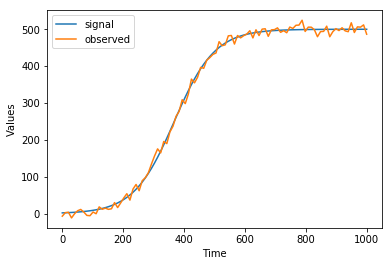

In [1]:
import os
os.chdir('/Users/appleuser/Desktop/AllPints/pints/')
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [ ]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.GalileanMC(log_likelihood, log_prior)

# Set number of iterations
sampler.set_iterations(4000)

# Set the number of posterior samples to generate
sampler.set_posterior_samples(400)

# Set the number of active points
sampler.set_active_points(1000)

# Set velocity proposal distribution
sampler.set_random_propose(False, mu=[0,0,0], sigma=[[0.005,0,0],[0,10,0],[0,0,0.1]])

Run the sampler!

In [ ]:
samples, marginal_log_likelihood = sampler.run()
print('Done!')

Running nested rejection sampling
Number of active points: 1000
Total number of iterations: 4000
Total number of posterior samples: 400
Iter. Eval. Time m:s
0     1       0:00.0
0     2       0:00.0
0     3       0:00.0
0     4       0:00.0
0     5       0:00.0
0     21      0:00.0
0     41      0:00.0
0     61      0:00.0
0     81      0:00.0
0     101     0:00.0
0     121     0:00.1
0     141     0:00.1
0     161     0:00.1
0     181     0:00.1
0     201     0:00.1
0     221     0:00.1
0     241     0:00.1
0     261     0:00.1
0     281     0:00.1
0     301     0:00.1
0     321     0:00.1
0     341     0:00.1
0     361     0:00.1
0     381     0:00.1
0     401     0:00.2
0     421     0:00.2
0     441     0:00.2
0     461     0:00.2
0     481     0:00.2
0     501     0:00.2
0     521     0:00.2
0     541     0:00.2
0     561     0:00.2
0     581     0:00.2
0     601     0:00.2
0     621     0:00.2
0     641     0:00.2
0     661     0:00.2
0     681     0:00.2
0     701     0:00.3
0  

pints/toy/_logistic_model.py:64: RuntimeWarning: overflow encountered in exp
  exp = np.exp(-r * times)
pints/toy/_logistic_model.py:67: RuntimeWarning: overflow encountered in multiply
  values = k / (1 + c * exp)


0     981     0:00.4
1000  1007    0:00.4
1020  1119    0:00.6
1040  1313    0:00.8
1060  1465    0:01.0
1080  1799    0:01.4
1100  2137    0:01.8
1120  2549    0:02.3
1140  2999    0:02.9
1160  3463    0:03.4
1180  4003    0:03.9
1200  4423    0:04.4
1220  5323    0:05.3
1240  5971    0:06.0


pints/_log_likelihoods.py:154: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1260  6575    0:06.7
1280  7167    0:07.3
1300  7933    0:08.1
1320  8681    0:09.0
1340  9479    0:09.8
1360  10523   0:10.9
1380  11699   0:12.1
1400  12879   0:13.3
1420  14119   0:14.6
1440  15211   0:15.7
1460  16611   0:17.1
1480  18081   0:18.6
1500  19149   0:19.7
1520  20329   0:21.0
1540  22021   0:22.7
1560  23367   0:24.2
1580  25187   0:25.9
1600  25863   0:26.6
1620  27259   0:28.0
1640  28551   0:29.4
1660  29995   0:31.0
1680  31577   0:32.7
1700  32797   0:34.1
1720  34163   0:35.7
1740  35577   0:37.2
1760  37055   0:39.0
1780  39121   0:41.3
1800  40693   0:43.0
1820  41753   0:44.2
1840  42981   0:45.5
1860  44473   0:47.1
1880  47461   0:50.4
1900  49709   0:52.8
1920  51241   0:54.5
1940  53351   0:56.9
1960  55059   0:58.8
1980  56817   1:00.7
2000  58639   1:02.7
2020  60923   1:05.1
2040  62835   1:07.2
2060  64987   1:09.5
2080  67095   1:11.7
2100  68839   1:13.5
2120  70949   1:15.7
2140  72419   1:17.2
2160  75131   1:20.0
2180  77259   1:22.3
2200  78815  

## Plot posterior samples versus true parameter values (dashed lines)

In [ ]:
samples

In [ ]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

In [ ]:
vTheta = samples[0]
pints.plot.pairwise(samples, kde=True)

plt.show()

## Plot posterior predictive simulations versus the observed data

In [ ]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [ ]:
print('marginal log-likelihood = ' + str(marginal_log_likelihood))